In [2]:
# Load the dataset to perform EDA and correlation analysis
import pandas as pd

# Load the dataset
dataset_path = './datasetFW.csv'
data = pd.read_csv(dataset_path)
new_data = pd.read_csv('nedata.csv')



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     539 non-null    int64  
 1   SrcIP        539 non-null    object 
 2   SrcPort      539 non-null    int64  
 3   DestIP       539 non-null    object 
 4   DestPort     539 non-null    int64  
 5   BytesTotal   539 non-null    int64  
 6   Msg          539 non-null    object 
 7   Malicious    539 non-null    int64  
 8   Malicious.1  539 non-null    int64  
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(3), int64(6), object(3)
memory usage: 50.7+ KB


In [4]:
data.head()

,DateTime,SrcIP,SrcPort,DestIP,DestPort,BytesTotal,Msg,Malicious,Malicious.1,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,206.189.141.16,34862,169.244.6.98,22,60,-,0,0,NaN,NaN,NaN
1,1,206.189.141.16,34862,169.244.6.98,22,4281,-,0,0,NaN,NaN,NaN
2,1,206.189.201.63,41400,169.244.6.98,22,60,-,0,0,NaN,NaN,NaN
3,1,206.189.201.63,41400,169.244.6.98,22,4313,-,0,0,NaN,NaN,NaN
4,1,206.189.201.63,44586,169.244.6.98,22,60,-,0,0,NaN,NaN,NaN


In [5]:
#drop the last four columns
data = data.drop(data.columns[-4:], axis=1)
data.head()

,DateTime,SrcIP,SrcPort,DestIP,DestPort,BytesTotal,Msg,Malicious
0,1,206.189.141.16,34862,169.244.6.98,22,60,-,0
1,1,206.189.141.16,34862,169.244.6.98,22,4281,-,0
2,1,206.189.201.63,41400,169.244.6.98,22,60,-,0
3,1,206.189.201.63,41400,169.244.6.98,22,4313,-,0
4,1,206.189.201.63,44586,169.244.6.98,22,60,-,0


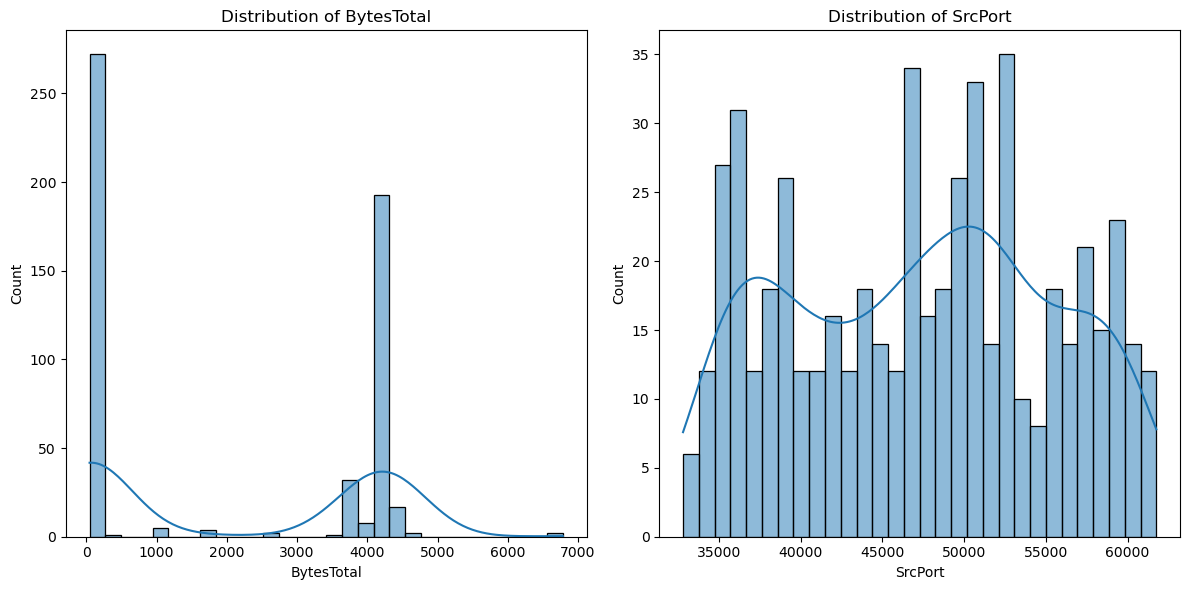

In [6]:
# Drop the empty 'Unnamed' columns

# Visualizing the distribution of 'BytesTotal' and 'SrcPort'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Distribution of BytesTotal
plt.subplot(1, 2, 1)
sns.histplot(data['BytesTotal'], bins=30, kde=True)
plt.title('Distribution of BytesTotal')

# Distribution of SrcPort
plt.subplot(1, 2, 2)
sns.histplot(data['SrcPort'], bins=30, kde=True)
plt.title('Distribution of SrcPort')

plt.tight_layout()
plt.show()


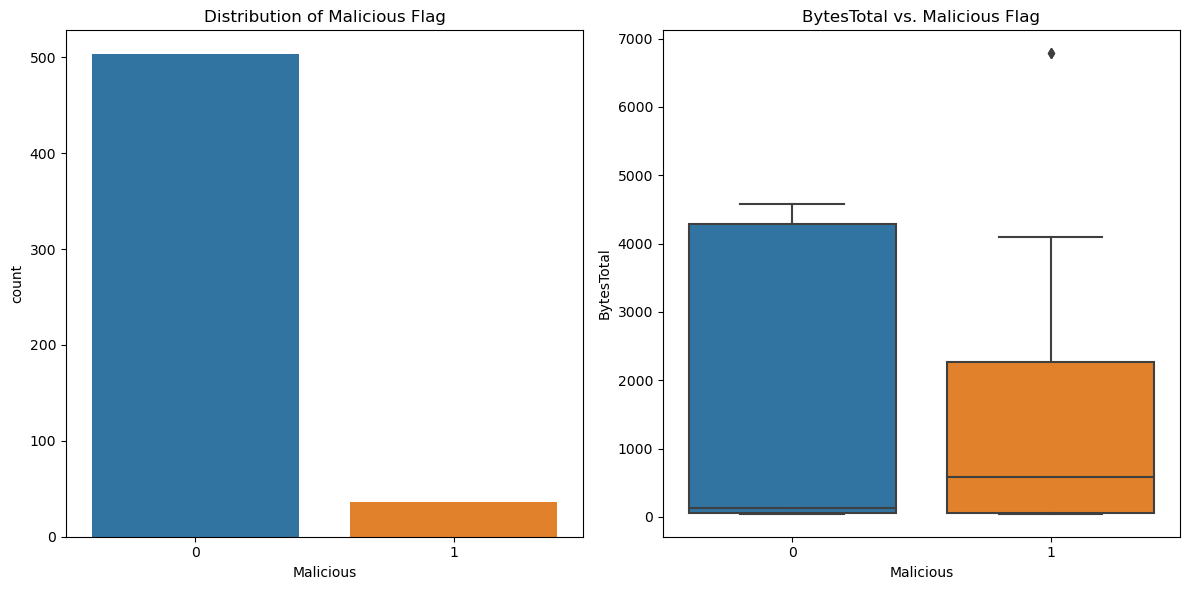

In [7]:
plt.figure(figsize=(12, 6))

# Distribution of Malicious flag
plt.subplot(1, 2, 1)
sns.countplot(x='Malicious', data=data)
plt.title('Distribution of Malicious Flag')

# Relationship between BytesTotal and Malicious flag
plt.subplot(1, 2, 2)
sns.boxplot(x='Malicious', y='BytesTotal', data=data)
plt.title('BytesTotal vs. Malicious Flag')

plt.tight_layout()
plt.show()


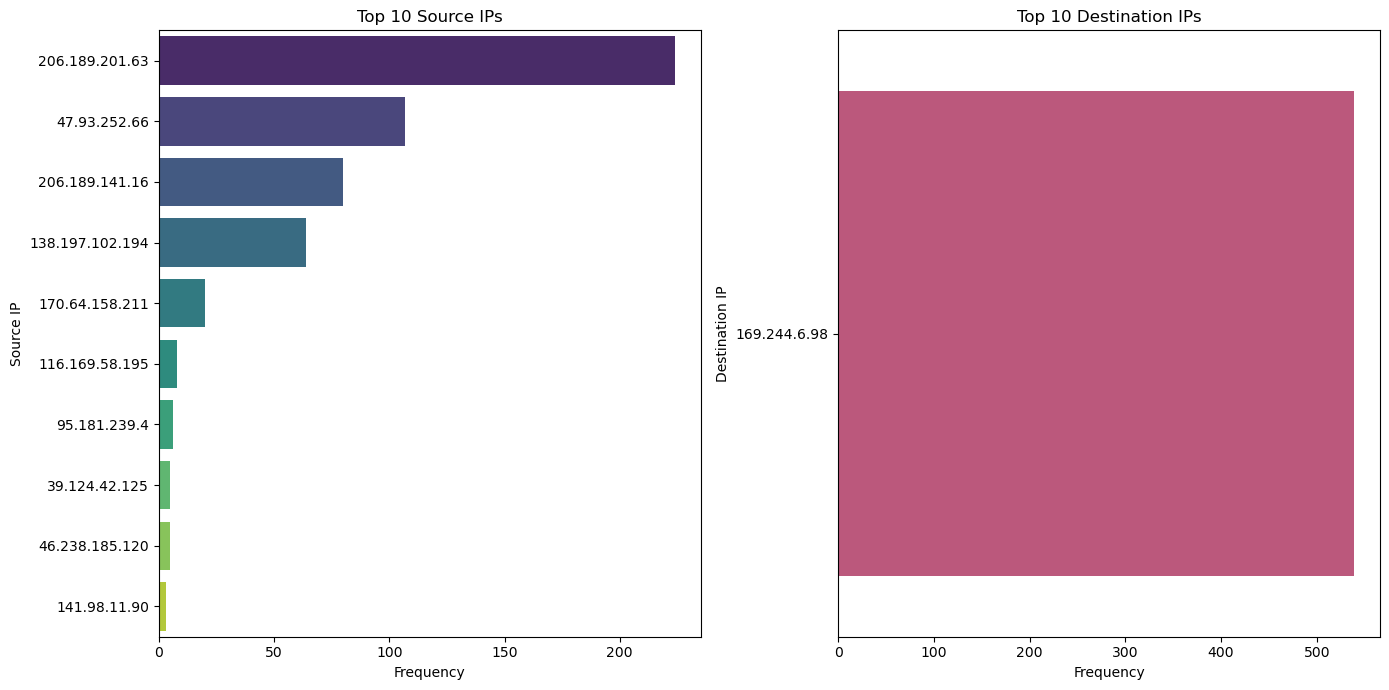

In [8]:
# Analyzing the frequency of Source and Destination IP addresses
src_ip_counts = data['SrcIP'].value_counts().head(10)
dest_ip_counts = data['DestIP'].value_counts().head(10)

plt.figure(figsize=(14, 7))

# Top 10 Source IPs
plt.subplot(1, 2, 1)
sns.barplot(y=src_ip_counts.index, x=src_ip_counts.values, palette='viridis')
plt.title('Top 10 Source IPs')
plt.xlabel('Frequency')
plt.ylabel('Source IP')

# Top 10 Destination IPs
plt.subplot(1, 2, 2)
sns.barplot(y=dest_ip_counts.index, x=dest_ip_counts.values, palette='plasma')
plt.title('Top 10 Destination IPs')
plt.xlabel('Frequency')
plt.ylabel('Destination IP')

plt.tight_layout()
plt.show()


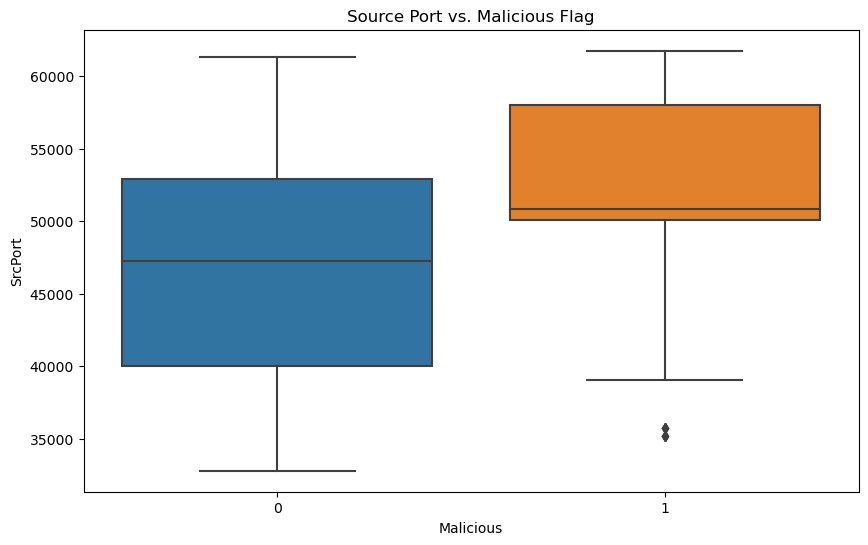

In [9]:
# Analyzing Source Port usage in relation to Malicious flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='Malicious', y='SrcPort', data=data)
plt.title('Source Port vs. Malicious Flag')
plt.show()


In [10]:

# Calculate frequency encoding for SrcIP and DestIP
src_ip_freq = data['SrcIP'].value_counts().to_dict()
dest_ip_freq = data['DestIP'].value_counts().to_dict()
new_src_ip_freq = new_data['SrcIP'].value_counts().to_dict()
new_dest_ip_freq = new_data['DestIP'].value_counts().to_dict()

# Map the frequencies back to the dataframe
data['SrcIP_freq'] = data['SrcIP'].map(src_ip_freq)
data['DestIP_freq'] = data['DestIP'].map(dest_ip_freq)
new_data['SrcIP_freq'] = new_data['SrcIP'].map(new_src_ip_freq)
new_data['DestIP_freq'] = new_data['DestIP'].map(new_dest_ip_freq)

# Drop original IP address columns to avoid multicollinearity
data_fe = data.drop(columns=['SrcIP', 'DestIP'])
new_data_fe = new_data.drop(columns=['SrcIP', 'DestIP'])

# Display the first few rows to verify the transformation
data_fe.head()


,DateTime,SrcPort,DestPort,BytesTotal,Msg,Malicious,SrcIP_freq,DestIP_freq
0,1,34862,22,60,-,0,80,539
1,1,34862,22,4281,-,0,80,539
2,1,41400,22,60,-,0,224,539
3,1,41400,22,4313,-,0,224,539
4,1,44586,22,60,-,0,224,539


In [11]:
data_fe.drop("Msg",axis = 1, inplace = True)

In [12]:
# Perform Exploratory Data Analysis (EDA) and Correlation Analysis

# Statistical summary of numerical features
statistical_summary = data.describe()



# Correlation analysis
correlation_matrix = data_fe.corr()

statistical_summary


,DateTime,SrcPort,DestPort,BytesTotal,Malicious,SrcIP_freq,DestIP_freq
count,539.000000,539.000000,539.0,539.000000,539.00000,539.000000,539.0
mean,0.289425,47339.998145,22.0,2058.630798,0.06679,134.910946,539.0
std,0.453917,8040.613137,0.0,2070.058425,0.24989,79.932357,0.0
min,0.000000,32790.000000,22.0,46.000000,0.00000,2.000000,539.0
25%,0.000000,40000.000000,22.0,60.000000,0.00000,80.000000,539.0
50%,0.000000,47694.000000,22.0,130.000000,0.00000,107.000000,539.0
75%,1.000000,53130.000000,22.0,4281.000000,0.00000,224.000000,539.0
max,1.000000,61762.000000,22.0,6785.000000,1.00000,224.000000,539.0


In [13]:
correlation_matrix

,DateTime,SrcPort,DestPort,BytesTotal,Malicious,SrcIP_freq,DestIP_freq
DateTime,1.000000,-0.051761,NaN,-0.009694,-0.154351,0.015107,NaN
SrcPort,-0.051761,1.000000,NaN,-0.021172,0.116702,-0.070481,NaN
DestPort,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BytesTotal,-0.009694,-0.021172,NaN,1.000000,-0.067383,0.049192,NaN
Malicious,-0.154351,0.116702,NaN,-0.067383,1.000000,-0.376579,NaN
SrcIP_freq,0.015107,-0.070481,NaN,0.049192,-0.376579,1.000000,NaN
DestIP_freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import numpy as np



# Step 3: Port and Payload Processing
# Categorizing SrcPort into common ranges (This is a simplified example; actual ranges might differ)
# Common ports: 0-1023, Registered ports: 1024-49151, Dynamic/Private ports: 49152-65535
data_fe['SrcPort_Category'] = pd.cut(data_fe['SrcPort'],
                                     bins=[0, 1023, 49151, 65535],
                                     labels=['Common', 'Registered', 'Dynamic/Private'])
new_data_fe['SrcPort_Category'] = pd.cut(new_data_fe['SrcPort'],
                                     bins=[0, 1023, 49151, 65535],
                                     labels=['Common', 'Registered', 'Dynamic/Private'])

# Logarithmic transformation of BytesTotal to normalize its scale
data_fe['BytesTotal_Log'] = np.log1p(data_fe['BytesTotal'])  # Adding 1 to avoid log(0)
new_data_fe['BytesTotal_Log'] = np.log1p(new_data_fe['BytesTotal'])  # Adding 1 to avoid log(0)

# Drop original columns to avoid redundancy
data_fe = data_fe.drop(columns=['SrcPort', 'BytesTotal'])
new_data_fe = new_data_fe.drop(columns=['SrcPort', 'BytesTotal'])

# Display the first few rows to verify the transformations
data_fe.head()


,DateTime,DestPort,Malicious,SrcIP_freq,DestIP_freq,SrcPort_Category,BytesTotal_Log
0,1,22,0,80,539,Registered,4.110874
1,1,22,0,80,539,Registered,8.362175
2,1,22,0,224,539,Registered,4.110874
3,1,22,0,224,539,Registered,8.369621
4,1,22,0,224,539,Registered,4.110874


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # 'balanced' to adjust weights inversely proportional to class frequencies


# One-hot encode the 'SrcPort_Category' column
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' to avoid multicollinearity
src_port_encoded = encoder.fit_transform(data_fe[['SrcPort_Category']])

# Create a DataFrame for the encoded columns
src_port_encoded_df = pd.DataFrame(src_port_encoded, columns=encoder.get_feature_names_out(['SrcPort_Category']))

# Concatenate the encoded columns back to the original DataFrame and drop the original 'SrcPort_Category' column
data_fe_encoded = pd.concat([data_fe.drop(columns=['SrcPort_Category']), src_port_encoded_df], axis=1)

# Split the data again with the encoded features
X_encoded = data_fe_encoded.drop(columns=['Malicious', 'DestPort'])
y_encoded = data_fe_encoded['Malicious']

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Retrain the model with the encoded features
rf.fit(X_train_encoded, y_train_encoded)

# Predictions
y_pred_encoded = rf.predict(X_test_encoded)

# Evaluation: focus on recall
conf_matrix_encoded = confusion_matrix(y_test_encoded, y_pred_encoded)



c:\Users\PC2\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
print(classification_report(y_test_encoded, y_pred_encoded))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       1.00      0.86      0.92         7

    accuracy                           0.99       108
   macro avg       1.00      0.93      0.96       108
weighted avg       0.99      0.99      0.99       108



In [17]:
conf_matrix_encoded

array([[101,   0],
       [  1,   6]], dtype=int64)

In [18]:


# Import XGBoost and other necessary libraries
import xgboost as xgb

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=sum(y_train_encoded == 0) / sum(y_train_encoded == 1), use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb_clf.fit(X_train_encoded, y_train_encoded)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test_encoded)

# Evaluate the model's performance focusing on recall
report_xgb = classification_report(y_test_encoded, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

report_xgb, conf_matrix_xgb


('              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00       101\n           1       1.00      0.86      0.92         7\n\n    accuracy                           0.99       108\n   macro avg       1.00      0.93      0.96       108\nweighted avg       0.99      0.99      0.99       108\n',
 array([[101,   0],
        [  1,   6]], dtype=int64))

In [19]:
print(report_xgb)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       1.00      0.86      0.92         7

    accuracy                           0.99       108
   macro avg       1.00      0.93      0.96       108
weighted avg       0.99      0.99      0.99       108



In [20]:
print(conf_matrix_xgb)

[[101   0]
 [  1   6]]


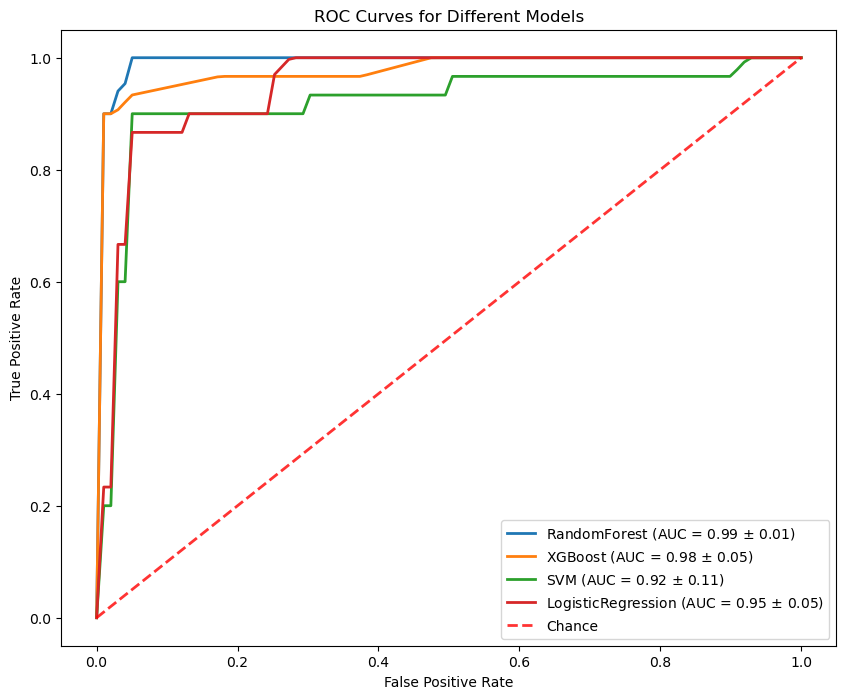

In [23]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression




import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd

# Assuming X_train_encoded and y_train_encoded are already defined

# Modify your models initialization if necessary
# Make sure to import RandomForestClassifier and xgb if you haven't already

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced')
}

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Prepare to store FPR and TPR for the ROC curves
roc_curves = {model_name: {'fpr': [], 'tpr': [], 'auc': []} for model_name in models.keys()}

for model_name, model in models.items():
    for train_index, test_index in skf.split(X_train_encoded, y_train_encoded):
        X_train_fold, X_test_fold = X_train_encoded.iloc[train_index], X_train_encoded.iloc[test_index]
        y_train_fold, y_test_fold = y_train_encoded.iloc[train_index], y_train_encoded.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        roc_curves[model_name]['fpr'].append(fpr)
        roc_curves[model_name]['tpr'].append(tpr)
        roc_curves[model_name]['auc'].append(roc_auc)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

for model_name, roc_data in roc_curves.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = roc_data['auc']
    for i in range(len(roc_data['tpr'])):
        tprs.append(np.interp(mean_fpr, roc_data['fpr'][i], roc_data['tpr'][i]))
        tprs[-1][0] = 0.0
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})', lw=2)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

       


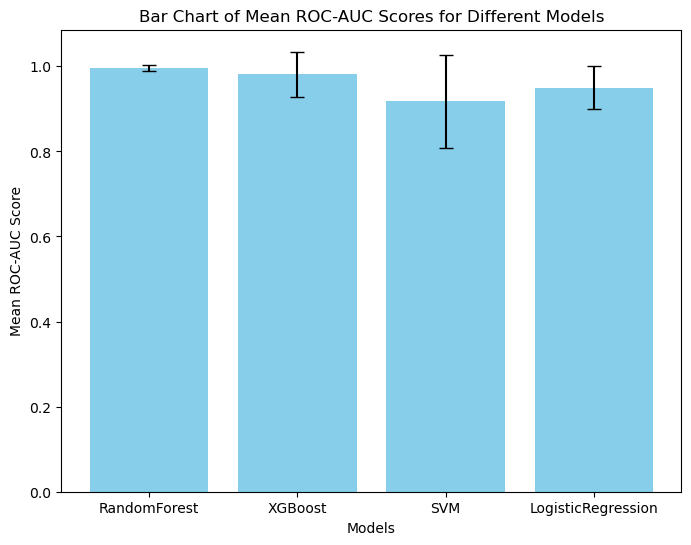

In [39]:
mean_auc_scores = {model_name: np.mean(aucs['auc']) for model_name, aucs in roc_curves.items()}

plt.figure(figsize=(8, 6))
model_names = list(mean_auc_scores.keys())
mean_aucs = [np.mean(roc_curves[model]['auc']) for model in model_names]
std_aucs = [np.std(roc_curves[model]['auc']) for model in model_names]

# Create the bar chart
plt.bar(model_names, mean_aucs, yerr=std_aucs, capsize=5, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Bar Chart of Mean ROC-AUC Scores for Different Models')
plt.show()

In [24]:
# Train the best model Logistic Regression on a dataset.

best_model = LogisticRegression(max_iter=1000, class_weight='balanced')
best_model.fit(X_train_encoded, y_train_encoded)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [25]:
# Get the coefficients
coefficients = best_model.coef_[0]  # Coefficients for the features

# Create a DataFrame for easier interpretation
feature_names = X_train_encoded.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients sorted by magnitude (absolute value)
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print(coef_df)

                       Feature  Coefficient
0                     DateTime    -2.021108
4  SrcPort_Category_Registered    -1.654217
1                   SrcIP_freq    -0.040933
3               BytesTotal_Log    -0.032868
2                  DestIP_freq     0.006516


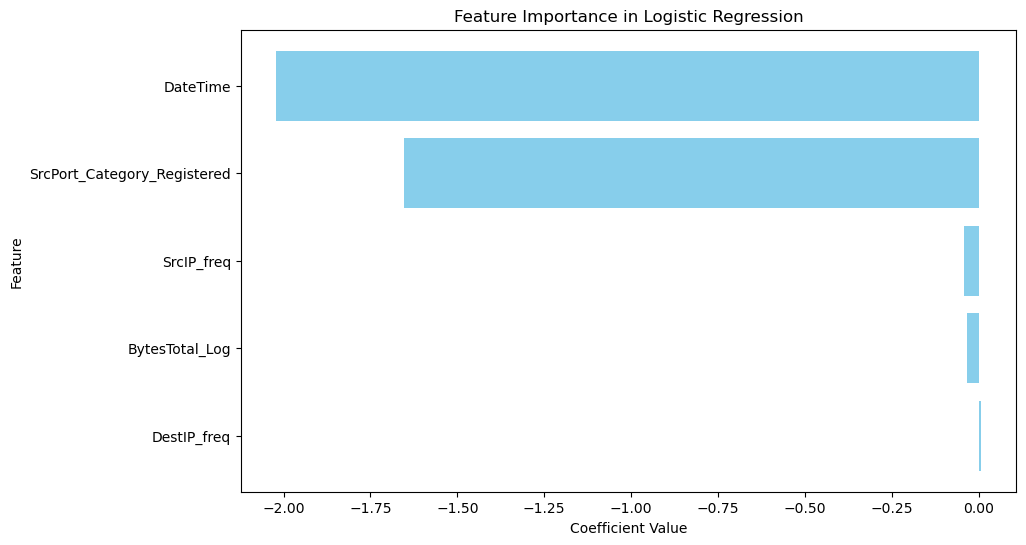

In [26]:
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

Negative Coefficients: Indicate that as the feature value increases, the probability of the target variable being 1 decreases.

In [27]:
new_data_fe.drop("Msg",axis = 1, inplace = True)
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' to avoid multicollinearity
src_port_encoded = encoder.fit_transform(new_data_fe[['SrcPort_Category']])

# Create a DataFrame for the encoded columns
src_port_encoded_df = pd.DataFrame(src_port_encoded, columns=encoder.get_feature_names_out(['SrcPort_Category']))

# Concatenate the encoded columns back to the original DataFrame and drop the original 'SrcPort_Category' column
new_data_fe_encoded = pd.concat([new_data_fe.drop(columns=['SrcPort_Category']), src_port_encoded_df], axis=1)

# Split the data again with the encoded features
X_encoded = new_data_fe_encoded.drop(columns=['Malicious', 'DestPort'])
y_encoded = new_data_fe_encoded['Malicious']

#predict using the best model on new data
y_pred_new = best_model.predict(X_encoded)


c:\Users\PC2\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


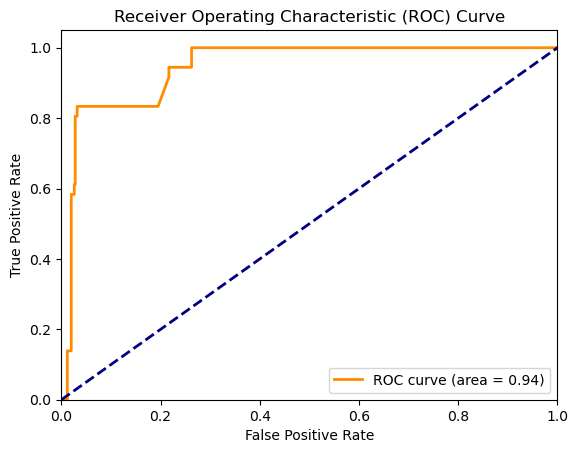

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming `best_model` is already trained and `X_encoded` is your features for the test set
y_pred_prob = best_model.predict_proba(X_encoded)[:, 1]  # get probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_encoded, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_encoded, y_pred_prob)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [29]:
# Evaluate the model's performance focusing on recall
report_new = classification_report(y_encoded, y_pred_new)
print("\n\n")
print("Classification Report (Recall Focus): \n", report_new)

# Print out the confusion matrix for recall focus
cm_new = confusion_matrix(y_encoded, y_pred_new)





Classification Report (Recall Focus): 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       503
           1       0.32      0.83      0.46        36

    accuracy                           0.87       539
   macro avg       0.65      0.85      0.69       539
weighted avg       0.94      0.87      0.89       539



In [30]:
new_data["Malicious Predictions"] = y_pred_new


In [31]:
xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_encoded, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

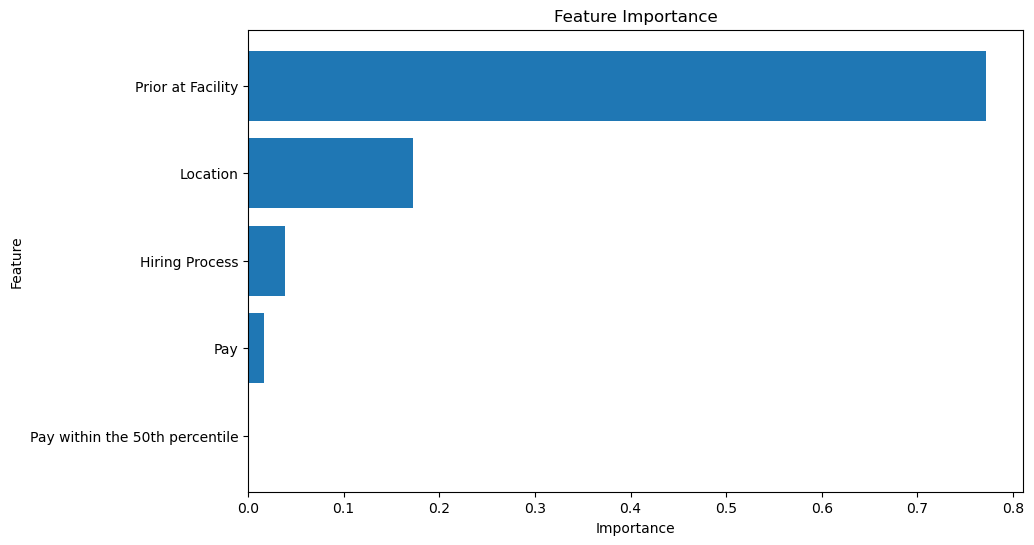

In [32]:
# Extract feature importance
importances = xgb.feature_importances_

# Create a DataFrame for visualization
feature_names = X_train_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df["Feature"] = ["Location", "Prior at Facility", "Pay within the 50th percentile","Pay","Hiring Process"]


# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [33]:
# change the names of the features in the feature ipmortance dataframe


In [34]:
y_pred_new_xg = xgb.predict(X_encoded)
new_data["Malicious Predictions XGBoost"] = y_pred_new_xg


In [35]:
new_data.to_csv("new_data_predictions.csv", index=False)

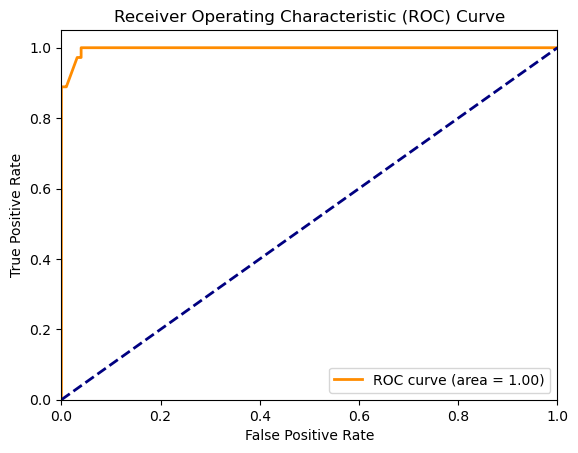

In [36]:


# Assuming `best_model` is already trained and `X_encoded` is your features for the test set
y_pred_prob = xgb.predict_proba(X_encoded)[:, 1]  # get probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_encoded, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_encoded, y_pred_prob)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
report_new = classification_report(y_encoded, y_pred_new)
print("\n\n")
print("Classification Report (Recall Focus): \n", report_new)

# Print out the confusion matrix for recall focus
cm_new = confusion_matrix(y_encoded, y_pred_new)




Classification Report (Recall Focus): 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       503
           1       0.32      0.83      0.46        36

    accuracy                           0.87       539
   macro avg       0.65      0.85      0.69       539
weighted avg       0.94      0.87      0.89       539



In [ ]:
cm_new

array([[438,  65],
       [  6,  30]], dtype=int64)